In [1]:
## Aim: Rate Movies as 1 star or 5 star by processing the textual review given by people about it.

In [2]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#download the dataset called yelp from kaggle.com
#read it using pandas
data = pd.read_csv('yelp.csv')

In [4]:
# create a new column to get the length of the textual review which we will be processing
data['text length'] = data['text'].apply(len)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
# lets check the correlation(if any) in our data
cor = data.corr()['stars']


In [8]:
# so we conclude that there is no strong correlation of number of stars a movie gets, with any other variable

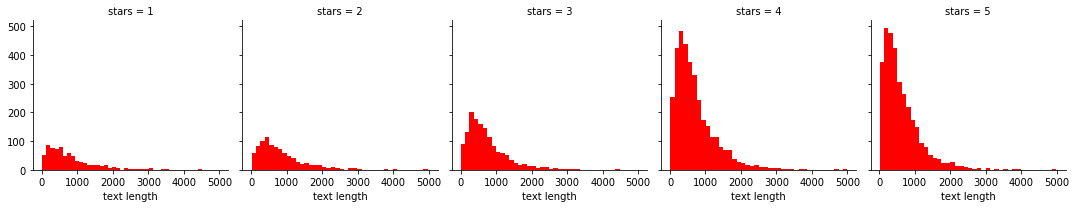

In [9]:
# performing some more visualizations
p = sns.FacetGrid(data,col='stars')
p.map(plt.hist,'text length',bins=40,color='red')

In [10]:
# observe how star rating vary with text length

<AxesSubplot:xlabel='stars', ylabel='count'>

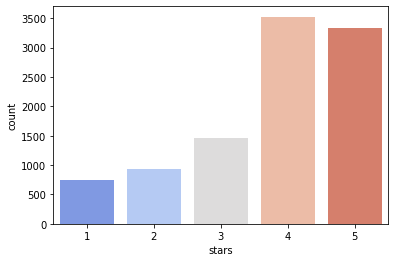

In [11]:
#countplot to count the number of occurrences for each type of star rating
sns.countplot(data=data,x='stars',palette='coolwarm')

In [12]:
# classify movies as either 1 star or 5 star based on the textual review
data_new = data[(data['stars'] == 1) | (data['stars'] == 5)]
data_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [13]:
X = data_new['text']
y = data_new['stars']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [15]:
X = cv.fit_transform(X)

In [16]:
# performing train test split
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [18]:
# fitting model into the naive bayes MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [19]:
nb.fit(X_train,y_train)

MultinomialNB()

In [20]:
#performing predictions
pred = nb.predict(X_test)

In [21]:
#evaluating the model 
from sklearn.metrics import classification_report

In [22]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.63      0.79      0.70       195
           5       0.96      0.91      0.93      1031

    accuracy                           0.89      1226
   macro avg       0.79      0.85      0.82      1226
weighted avg       0.91      0.89      0.90      1226



In [23]:
# Accuracy = 91%

In [24]:
# Perform the same thing but this time including TF-IDF using a pipeline.

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pi = Pipeline([('cv_',CountVectorizer()),('tfidf_',TfidfTransformer()),('nb_',MultinomialNB())])

In [28]:
# perform train test split again
X = data_new['text']
y = data_new['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [29]:
pi.fit(X_train,y_train)

Pipeline(steps=[('cv_', CountVectorizer()), ('tfidf_', TfidfTransformer()),
                ('nb_', MultinomialNB())])

In [30]:
#predicting the star rating of the movie
predictions = pi.predict(X_test)

In [31]:
# evaluate the new model
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.80      0.89      1226

    accuracy                           0.80      1226
   macro avg       0.50      0.40      0.44      1226
weighted avg       1.00      0.80      0.89      1226



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Accuracy = 80% using pipeline and tfidf